# Modelo Ciclo Refrigeración

Importar librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Definir funciones

Para la temperatura y entropía en una isoterma e isoentrópica. Solo se eligen valores

In [2]:
from utils import diagrama_ts, diagrama_ph, LABEL_SIZE, MARKER_SIZE

## Ciclo Ideal Refrigeración por Compresión de Vapor

### Definir valores a gráficar

In [3]:
sat_temp = pd.read_csv("tables/r134a_saturada_temperatura.csv")
sat_pre = pd.read_csv("tables/r134a_saturada_presion.csv")
sobrecal = pd.read_csv("tables/r134a_vapor_sobrecalentado.csv")

# Doble interpolacion usando presion
def doble_interp_p(pressure, e, e_name, f_name):
    pressure1 = pressure
    pressure2 = pressure
    for p in sorted(np.unique(sobrecal["P[kPa]"])):
        if pressure <= p:
            pressure2 = p
            break
        else:
            pressure1 = p
    f_1 = np.interp(e,
        sobrecal[sobrecal["P[kPa]"] == pressure1][e_name],
        sobrecal[sobrecal["P[kPa]"] == pressure1][f_name])
    f_2 = np.interp(e,
        sobrecal[sobrecal["P[kPa]"] == pressure2][e_name],
        sobrecal[sobrecal["P[kPa]"] == pressure2][f_name])
    return np.interp(pressure, [pressure1, pressure2], [f_1, f_2])

def doble_inter_p_vector(pressure, e, e_name, f_name):
    f = list()
    for e_index in e:
        f.append(doble_interp_p(pressure, e_index, e_name, f_name))
    return np.array(f)

In [4]:
P1 = P4 = 84.43
P2 = P3 = 1100.0
h1 = 232.17
h2 = 285.8094453868322
h3 = h4 = 112.54499999999999
s1 = 0.9557899999999999

P_12 = [P1, P2]
P_23 = [P2, P3]
P_34 = [P3, P4]
P_41 = [P4, P1]
H_12 = [h1, h2]
H_23 = [h2, h3]
H_34 = [h3, h4]
H_41 = [h4, h1]

In [5]:
H = [H_12, H_23, H_34, H_41]
P = [P_12, P_23, P_34, P_41]

In [6]:
h_sat = list(sat_pre["hf[kJ/kg]"]) + list(reversed(sat_pre["hg[kJ/kg]"]))
p_sat = list(sat_pre["P[kPa]"]) + list(reversed(sat_pre["P[kPa]"]))

### Graficar

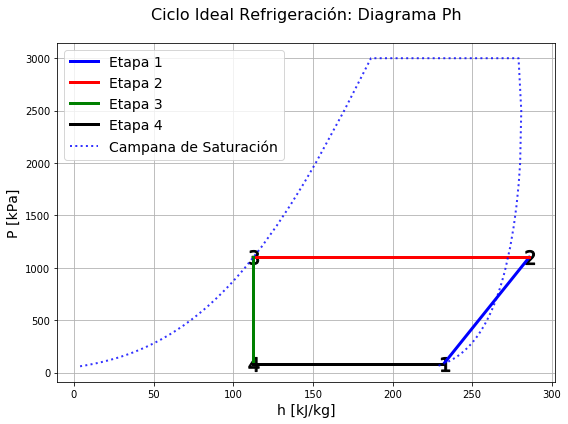

In [7]:
fig, ax = diagrama_ph(H, P, "Ciclo Ideal Refrigeración", False)
ax.plot(h_sat, p_sat, ":b", linewidth=2, alpha=0.8, label="Campana de Saturación")
ax.set_xlabel("h [kJ/kg]", fontsize=LABEL_SIZE)
ax.set_ylabel("P [kPa]", fontsize=LABEL_SIZE)
ax.legend(fontsize=LABEL_SIZE)

fig.tight_layout()

plt.savefig("../Matplotlib/ciclo_ideal_refrigeracion_ph.png")

## Ciclo Refrigeración en cascada

### Definir valores a gráficar

In [8]:
P2 = 450.0
P4 = 1200.0

T1 = T8 = -10.09
T2 = 18.923942636836173
T3 = T6 = T7 = 12.46
T4 = 57.30366218972622
T5 = 46.29
T9 = 17.24428325745499
s1 = 0.93773
s2 = 0.9470711257084787
s3 = 0.92535
s4 = 0.95204370779835
s5 = 0.43605669775328526
s6 = 0.25943196269605767
s7 = 0.26465
s8 = 0.2700502737465418
s9 = 0.9415751269866434

T12 = [T1, T2]
S12 = [s1, s2]
T29 = np.linspace(T2, T9)
S29 = doble_inter_p_vector(P2, T29, "T[°C]", "s[kJ/kg·K]")
T39 = np.linspace(T3, T9)
S39 = doble_inter_p_vector(P2, T39, "T[°C]", "s[kJ/kg·K]")
T45 = np.linspace(T4, T5)
S45 = doble_inter_p_vector(P4, T45, "T[°C]", "s[kJ/kg·K]")
T45 = list(T45) + [T5]
S45 = list(S45) + [s5]

In [9]:
T94 = [T9, T4]
S94 = [s9, s4]
T56 = [T5, T6]
S56 = [s5, s6]
T63 = [T6, T3]
S63 = [s6, s3]
T67 = [T6, T7]
S67 = [s6, s7]
T78 = [T7, T8]
S78 = [s7, s8]
T81 = [T8, T1]
S81 = [s8, s1]

In [10]:
s_sat = list(sat_pre["sf[kJ/kg·K]"]) + list(reversed(sat_pre["sg[kJ/kg·K]"]))
t_sat = list(sat_pre["T[°C]"]) + list(reversed(sat_pre["T[°C]"]))

### Graficar

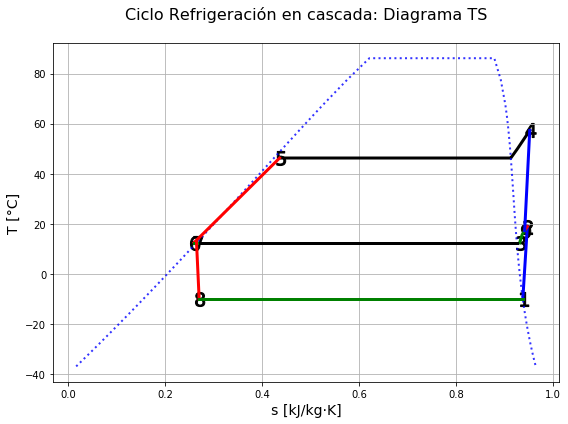

In [11]:
fig, ax = diagrama_ts([S12, S29, S39, S45], [T12, T29, T39, T45], "Ciclo Refrigeración en cascada", False)
ax.plot(s_sat, t_sat, ":b", linewidth=2, alpha=0.8, label="Campana de Saturación")
ax.plot(S94, T94, "b", linewidth=3)
ax.plot(S56, T56, "r", linewidth=3)
ax.plot(S63, T63, "k", linewidth=3)
ax.plot(S67, T67, "g", linewidth=3)
ax.plot(S78, T78, "r", linewidth=3)
ax.plot(S81, T81, "g", linewidth=3)
ax.scatter(s5, T5, marker='$5$', color='k', s=MARKER_SIZE)
ax.scatter(s6, T6, marker='$6$', color='k', s=MARKER_SIZE)
ax.scatter(s7, T7, marker='$7$', color='k', s=MARKER_SIZE)
ax.scatter(s8, T8, marker='$8$', color='k', s=MARKER_SIZE)
ax.scatter(s9, T9, marker='$9$', color='k', s=MARKER_SIZE)

ax.set_xlabel("s [kJ/kg·K]", fontsize=LABEL_SIZE)
ax.set_ylabel("T [°C]", fontsize=LABEL_SIZE)
ax.get_legend().remove()

fig.tight_layout()

fig.savefig("../Matplotlib/ciclo_refrigeracion_en_casacada_ts.png")